In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel(r"C:\Abinaya\NumpyNinja\phython hackathon\HospitalDatabase .xlsx",sheet_name=None)
edvisits=df['EDVisits']
ambulatoryvisits=df['AmbulatoryVisits']
providers=df['Providers']
patients=df['Patients']
edunique=df['EDUnique']
readmissionregistry=df['ReAdmissionRegistry']
discharges=df['Discharges']

# Q 61 np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [3]:
array=np.arange(1,31).reshape(6,5)
print(array)
array[2:4,0:2]

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]


array([[11, 12],
       [16, 17]])

# Q 62 Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.

In [4]:
Newdf=pd.DataFrame(edvisits.groupby(['Acuity','EDDisposition']).agg(Count_Of_Patients=('PatientID','count')))
Newdf


Count_Of_Patients
Acuity EDDisposition                   
1      Admitted                      32
       Discharged                   558
2      Admitted                     116
       Discharged                    66
3      Admitted                      81
4      Admitted                     107
       Discharged                    30
5      Admitted                     179
       Discharged                    30

# Q 63 List male patients over the age of 60 who have undergone surgery from January-March 2019.

In [5]:
from datetime import datetime
now = datetime.now()
patients['age']=(now-patients['DateOfBirth']).astype('<m8[Y]')
ambulatoryvisits.rename(columns={'PatientMRN':'PatientID'},inplace=True)
pat_ambu=pd.merge(patients,ambulatoryvisits,how='inner',on='PatientID')
pat_ambu_provid=pd.merge(pat_ambu,providers,how='left',on='ProviderID')

pat_ambu_provid=pat_ambu_provid[(pat_ambu_provid['Gender']== 'Male')&(pat_ambu_provid['age']>60)&(pat_ambu_provid['ProviderSpecialty']=='Surgery')
                                &((pat_ambu_provid['DateofVisit']> '2019-01-01')&(pat_ambu_provid['DateofVisit']< '2019-03-31'))]
pat_ambu_provid1=pat_ambu_provid.loc[:,['Gender','age','ProviderSpecialty','DateofVisit']]
pat_ambu_provid1

,Gender,age,ProviderSpecialty,DateofVisit
11,Male,61.0,Surgery,2019-01-12
15,Male,63.0,Surgery,2019-01-16
343,Male,62.0,Surgery,2019-03-01
441,Male,61.0,Surgery,2019-02-09


# Q 64 Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

In [6]:
providers[['First_Name','Last_name']]=providers['ProviderName'].str.split(' ',expand=True)
providersdf=pd.DataFrame(providers)
providersdf

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff,First_Name,Last_name
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000,Sally,Sue
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695,Mike,Myers
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687,Jordan,Michael
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299,Ted,Texas
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838,Ala,Bama
5,6,Harry Kane,Pediatrics,1995-07-21 03:49:03.310,Harry,Kane
6,7,Barry Bar,Pediatrics,1995-11-21 19:30:38.759,Barry,Bar
7,8,Ted Green,Pediatrics,1996-05-30 06:14:52.539,Ted,Green
8,9,Ted Black,Pediatrics,1997-02-20 08:01:10.211,Ted,Black
9,10,Fred Man,Surgery,1998-03-17 01:47:18.794,Fred,Man


# Q 65 Plot a graph showing the count of patients for the reason visited the hospital.

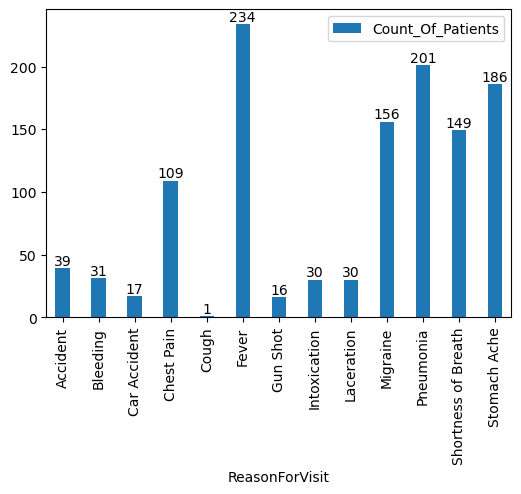

In [61]:
edvisits1=edvisits.groupby('ReasonForVisit').agg(Count_Of_Patients=('PatientID','count'))
ax = edvisits1.plot.bar(figsize=(6,4), width=0.4)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


# Q 66 Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.

In [8]:
pat_eduni=pd.merge(edunique,patients,how='right',on='PatientID')
pat_eduni.loc[pat_eduni['ReasonForVisit']=='Migraine',['FirstName','LastName','DateOfBirth','ReasonForVisit']]


,FirstName,LastName,DateOfBirth,ReasonForVisit
1,Far,Myers,1985-11-15 02:08:42.090,Migraine
2,Devlin,Michael,1976-04-15 02:52:09.762,Migraine
11,Zonnya,Ab,1963-05-23 10:04:33.074,Migraine
13,Gan,Yu,1970-06-02 06:22:54.675,Migraine
21,Joesph,Long,1979-12-04 16:45:56.080,Migraine
...,...,...,...,...
896,Barrows,Coupland,1979-10-31 18:28:35.483,Migraine
907,Knox,Group,1975-08-25 22:27:50.177,Migraine
909,Kuvalis,Coupland,1986-05-23 19:23:27.752,Migraine
914,Jerrilyn,Dyson,1978-01-18 02:41:55.178,Migraine


# Q 67 Make a pivot table by the no. of patients from the admission date till discharge date.

In [9]:
readmissionregistry['Discharge_Date']=pd.to_datetime(readmissionregistry['DischargeDate']).dt.date
pd.pivot_table(readmissionregistry,index=['AdmissionDate','Discharge_Date'],values='PatientID',aggfunc='count')


PatientID
AdmissionDate Discharge_Date           
2018-01-01    2018-01-04              3
              2018-01-05              2
              2018-01-06              1
              2018-01-07              3
              2018-01-08              1
...                                 ...
2018-02-22    2018-03-05              1
              2018-03-06              1
              2018-03-07              4
              2018-03-08              2
              2018-03-10              2

[459 rows x 1 columns]

# Q 68 Calculate average LOS.

In [52]:
discharges['LOS']=discharges['DischargeDate']-discharges['AdmissionDate']
discharges['LOS'].mean()

Timedelta('10 days 00:37:20.538901388')

# Q 69 Number of patients on 'Transfer' based on primary diagnosis.

In [10]:
discharges.loc[discharges.DischargeDisposition == 'Transfer'].groupby(['PrimaryDiagnosis']).agg({'PatientID' : ['count']})


,PatientID
,count
PrimaryDiagnosis,
Afib,1
Diabetes,7
Flu,2
Heart Failure,9
Knee Replacement,1
Laceration,1
Pain,1
Pneumonia,8


# Q 70 Violin plot for Level of Acuity by Visit Reason

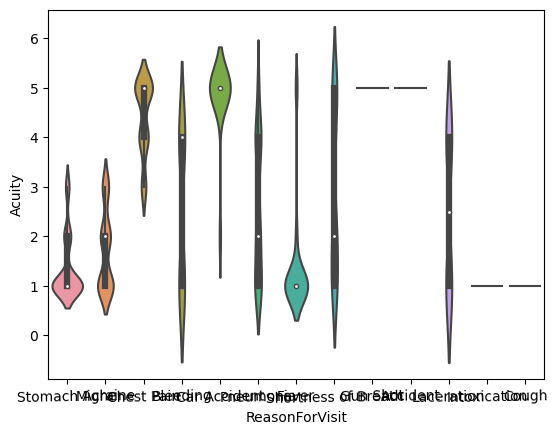

In [36]:
import seaborn as sns
sns.violinplot(x = 'ReasonForVisit', y = 'Acuity', data = edvisits)
plt.xticks(rotation=1)
plt.show()


# Q 71 Find the count of White Spanish Male.

In [11]:
patients[(patients['Gender']=='Male')&(patients['Race']=='White')&(patients['Language']=='Spanish')].agg({'PatientID' : ['count']})

,PatientID
count,15


# Q 72 Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?

In [12]:
exp=readmissionregistry.groupby('PrimaryDiagnosis').agg({'ExpectedLOS': np.ptp})
exp[exp['ExpectedLOS']==exp['ExpectedLOS'].max()]

,ExpectedLOS
PrimaryDiagnosis,
Pneumonia,14.83426


# Q 73 Which patient id has most entries in readmission registry.

In [13]:
readmissionregistry['PatientID'].value_counts().idxmax()



23

# Q 74 "Create a figure object called fig using plt.figure() **
 # ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **** Plot (x,y) on that axes and set the labels.Note : You can plot on any x,y set of values."

# Q 75 "Using numpy functions, multiply the following arrays a=np.arange(6).reshape(2,3) b=np.arange(6).reshape(3,2)

In [14]:
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)
c=np.dot(a,b)
c

array([[10, 13],
       [28, 40]])

# Q 76 Mortality O:E

In [53]:
discharges_sum=discharges['ExpectedMortality'].sum()
discharges_exp=discharges.query("DischargeDisposition == 'Expired'")
discharges_total_exp= discharges_exp.count()[0]
mortal_oe=discharges_total_exp/discharges_sum
mortal_oe

0.4272709474250124

# Q 77 Plot a graph to count the patients based on discharge disposition.

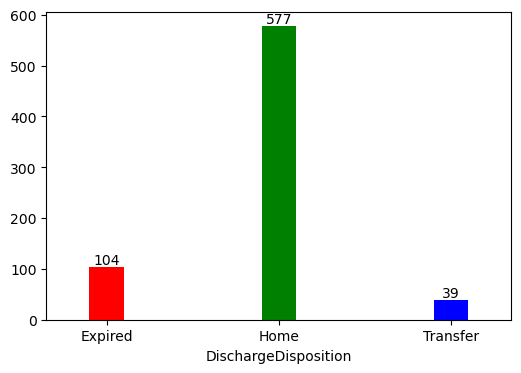

In [54]:
import matplotlib.pyplot as plt
dis=discharges.groupby('DischargeDisposition')['PatientID'].count()
ax = dis.plot.bar(figsize=(6,4), width=0.2,color=['r', 'g', 'b'])
ax.bar_label(ax.containers[0], label_type='edge')
plt.xticks(rotation=0)
plt.show()

# Q 78 Display total count of patients service wise based on gender.

In [15]:
pat_re=pd.merge(patients,readmissionregistry,how='inner',on='PatientID')
pat_re.groupby(['Gender','Service']).agg(count_Of_Patients=('PatientID','count'))


count_Of_Patients
Gender Service                            
Female Cardiology                       41
       General Medicine                114
       Hospitalist                      35
       ICU                              65
       Neurology                        34
       Orthopeadics                     22
Male   Cardiology                       54
       General Medicine                149
       Hospitalist                      66
       ICU                              86
       Neurology                        31
       Orthopeadics                     23

# Q 79 Create a pivot table displaying average LOS based on Service and Primary Diagnosis.

In [16]:
readmissionregistry['Los']=(readmissionregistry['DischargeDate']-readmissionregistry['AdmissionDate']).dt.days
pd.pivot_table(readmissionregistry,index=['Service','PrimaryDiagnosis'],values='Los',aggfunc='mean')

Los
Service          PrimaryDiagnosis             
Cardiology       AMI                 10.250000
                 Afib                11.200000
                 Broken Leg          10.666667
                 Flu                 12.000000
                 Heart Failure        9.512821
                 Kidney Failure       4.000000
General Medicine Broken Leg          13.000000
                 Diabetes            10.289474
                 Fever                8.000000
                 Flu                  9.888889
                 Hypertension         8.914286
                 Kidney Failure      10.666667
                 Laceration           9.428571
                 Pneumonia            9.417910
                 Stroke              11.250000
Hospitalist      AMI                 10.000000
                 Broken Leg           7.666667
                 Diabetes             8.846154
                 Fever               10.666667
                 Flu                  8.736842
                 Hypertension        10.666667
                 Kidney Failure      10.166667
                 Knee Replacement     6.000000
                 Laceration           9.000000
                 Pneumonia            8.928571
                 Stroke              16.000000
ICU              AMI                 12.200000
                 Afib                 6.000000
                 Fever               13.333333
                 Flu                  8.000000
                 Heart Failure        9.454545
                 Hypertension         8.500000
                 Kidney Failure      11.000000
                 Laceration          15.000000
                 Pneumonia            8.298701
                 Spinal Cord Injury  10.000000
                 Stroke              10.333333
Neurology        AMI                  9.000000
                 Flu                  7.000000
                 Heart Failure       13.166667
                 Hypertension         9.000000
                 Migraine             8.583333
                 Pain                10.285714
                 Pneumonia            9.800000
                 Stroke               9.615385
Orthopeadics     Hip Fracture         9.173913
                 Knee Replacement     9.500000

# Q 80 Display the data for all 'White Female' patients above the age of 50.

In [17]:
white_female=patients[(patients['Race']=='White')&
                            (patients['Gender']=='Female')&(patients['age']>50)]
white_female


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,age
28,29,Ted,Scott,1967-12-09 05:01:37.892,Female,White,Spanish,55.0
30,31,Harry,Ding,1960-10-08 01:42:51.212,Female,White,Spanish,62.0
33,34,Ted,Hue,1960-11-28 18:05:11.459,Female,White,Spanish,62.0
34,35,Fred,Tye,1966-04-14 06:01:07.169,Female,White,Spanish,56.0
39,40,Christian,Pow,1971-12-07 11:47:43.885,Female,White,Spanish,51.0
...,...,...,...,...,...,...,...,...
865,866,Jermayne,Lowndes,1970-12-09 04:49:48.933,Female,White,English,52.0
866,867,Gail,Inc,1967-03-10 08:18:47.908,Female,White,English,56.0
867,868,Des,Heindrick,1969-08-15 11:05:30.165,Female,White,English,53.0
869,870,Hauck,Rubbens,1963-11-16 03:31:38.929,Female,White,English,59.0


# Q 20

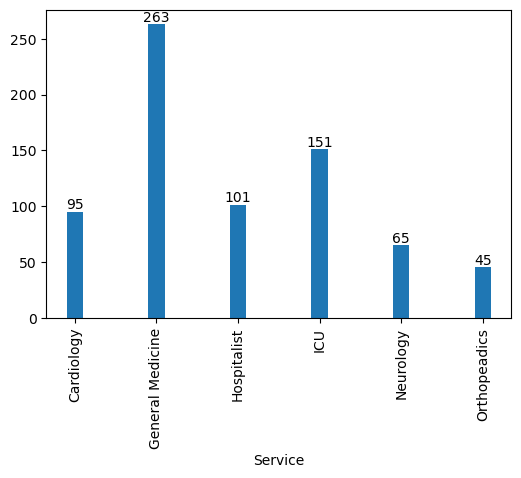

In [62]:
exp_mor=discharges.groupby('Service')['ExpectedMortality'].count()

ax = exp_mor.plot.bar(figsize=(6,4), width=0.2)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xticks(rotation='vertical')
plt.show()



In [69]:
# 19
readmissionregistry['avg']=readmissionregistry['ExpectedLOS'].max()-readmissionregistry['ExpectedLOS'].min()
exp_avg=readmissionregistry.loc[readmissionregistry['ExpectedLOS']>readmissionregistry['avg']]
exp_avg

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,Discharge_Date,Los,avg
6,549,8,2018-01-01,2018-01-07 15:39:25.987,Home,Hospitalist,Pneumonia,16.472257,0.526198,1.0,5.0,1.0,2018-01-07,6,14.985239
18,252,19,2018-01-01,2018-01-17 14:13:23.627,Home,Hospitalist,Stroke,15.349671,0.478003,NaN,NaN,NaN,2018-01-17,16,14.985239
31,550,27,2018-01-02,2018-01-13 07:34:46.603,Home,ICU,Pneumonia,15.415514,0.774480,1.0,5.0,1.0,2018-01-13,11,14.985239
46,391,41,2018-01-03,2018-01-10 00:57:05.440,Home,Cardiology,Afib,14.995421,0.385435,NaN,NaN,NaN,2018-01-10,7,14.985239
64,609,59,2018-01-04,2018-01-09 01:18:34.182,Home,ICU,Pneumonia,15.118850,0.967396,1.0,2.0,1.0,2018-01-09,5,14.985239
88,144,83,2018-01-05,2018-01-17 11:00:10.366,Home,ICU,Pneumonia,15.622700,0.395238,1.0,1.0,1.0,2018-01-17,12,14.985239
95,145,90,2018-01-06,2018-01-15 03:16:35.614,Home,ICU,Pneumonia,16.161806,0.824220,1.0,3.0,1.0,2018-01-15,9,14.985239
100,444,95,2018-01-06,2018-01-19 02:57:34.514,Home,ICU,Stroke,16.838918,0.958035,1.0,14.0,1.0,2018-01-19,13,14.985239
113,445,108,2018-01-07,2018-01-22 06:49:20.132,Home,ICU,Stroke,15.660602,0.639241,1.0,2.0,1.0,2018-01-22,15,14.985239
118,114,113,2018-01-08,2018-01-14 22:04:11.532,Home,ICU,Pneumonia,15.895307,0.629358,1.0,5.0,1.0,2018-01-14,6,14.985239


In [77]:
#18
pat_cnt=readmissionregistry['PatientID'].count()
#plt.pie(x=pat_cnt)
pat_cnt


720

SyntaxError: invalid syntax (3423120429.py, line 1)